## Stroke Prediction Dataset EDA Project 
Dataset:
fedesoriano. 2021-01-26. Stroke Prediction Dataset, Version 1. Retrieved 2021-05-20 from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset.

Stroke is the 5th leading cause of death and disability in the United States according to the American Heart Association.  Every 40 seconds in the US, someone experiences a stroke and every 4 minutes, someone dies from it according to the CDC. A recent figure of stroke-related cost almost reached $46 billion.  Through this project, we will explore which factors are the leading drivers for stroke to bring awareness to individuals and lay the basic analysis for future work in building a predictive model using Machine Learning which could be benefitial to hospitals and insurance companies in estimating risk and pricing.

In [37]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import math 
import seaborn as sns 
%matplotlib inline
plt.style.use('ggplot')

### Read in data & clean

In [4]:
df = pd.read_csv('stroke_prediction_data.csv')
df.head(10) # let's look at the top 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
1,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0
2,22877,Male,0.16,0,0,No,children,Urban,114.71,17.4,Unknown,0
3,41500,Male,0.16,0,0,No,children,Rural,69.79,13.0,Unknown,0
4,8247,Male,0.16,0,0,No,children,Urban,109.52,13.9,Unknown,0
5,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0
6,42500,Male,0.24,0,0,No,children,Rural,146.97,18.5,Unknown,0
7,64974,Male,0.24,0,0,No,children,Urban,58.35,18.6,Unknown,0
8,11371,Male,0.24,0,0,No,children,Urban,89.28,14.2,Unknown,0
9,69222,Male,0.24,0,0,No,children,Urban,57.09,19.4,Unknown,0


In [14]:
df.tail(10) # let's look at the bottom 10

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5100,40163,Female,82.0,1,0,Yes,Private,Urban,222.52,NaN,formerly smoked,0
5101,27596,Female,82.0,1,0,Yes,Private,Urban,115.71,31.1,formerly smoked,0
5102,21830,Female,82.0,0,0,Yes,Private,Urban,82.63,17.9,smokes,0
5103,62715,Male,82.0,0,1,Yes,Private,Urban,57.56,27.5,never smoked,0
5104,19271,Female,82.0,1,1,Yes,Self-employed,Urban,101.56,31.5,never smoked,0
5105,5387,Female,82.0,0,0,No,Private,Rural,96.98,21.5,never smoked,0
5106,19191,Male,82.0,0,0,Yes,Private,Urban,217.57,33.5,formerly smoked,0
5107,48118,Female,82.0,0,0,Yes,Self-employed,Urban,113.45,30.3,never smoked,0
5108,11184,Female,82.0,0,0,Yes,Self-employed,Rural,211.58,36.9,never smoked,0
5109,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0


In [7]:
df.shape  #5110 rows and 12 attributes 

(5110, 12)

In [11]:
df.info() #datatypes are numeric and object (categorical) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Let's find out the stroke percentage of the record:

In [42]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

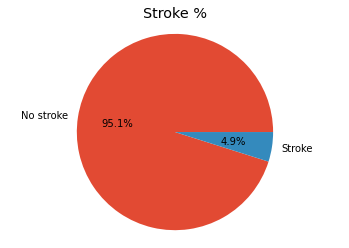

In [44]:
df_stroke = df['stroke'].value_counts()
my_labels = 'No stroke', 'Stroke'
plt.pie(df_stroke, labels = my_labels, autopct= '%1.1f%%')
plt.title('Stroke %')
plt.axis('equal')
plt.show()

In [19]:
 #Let's find out if there are any null values:  
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

BMI (Body Mass Index) field seems to have the only null values: 201/5110 = 3.9% of the whole dataset which is negligible but before we remove them from the analysis, let's see if there are any stroke patients among the null BMI since our total stroke percentage is 4.9%:

In [50]:
len(df[df['bmi'].isna() & df['stroke']==1]) 

40

There are 40 stroke patients among the null BMI values making up 16% of total strokes! so we will NOT remove them and instead will fill in the mean BMI values:

Let's explore the column fields more to learn about what kind of different values the categorical fields have:

5110